# Probability & Statistics 5

Estimation.

Recall in stats3.ipynb, we 

* plotted the histogram of birth weight (of the first baby of each pregnancy), 
* observed that it has a bell shape, and
* proceeded to fit a Normal distribution by calculating the mean and standard deviation from the data.

(6390,)
mean = 7.15326682316, std = 1.4848859011


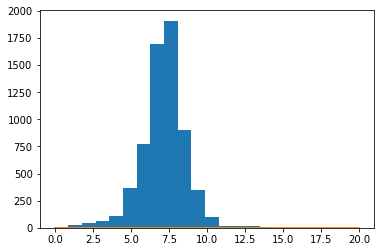

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sqlite3
import pprint

%matplotlib inline

conn = sqlite3.connect('nsfg.db')
curs = conn.cursor()

# find actual birth weight
curs.execute('SELECT birthwgt_lb1 + (birthwgt_oz1/16.0) '
             + 'FROM fempreg WHERE birthwgt_lb1 is not null '
             + 'AND birthwgt_oz1 is not null '
             + 'AND birthwgt_lb1 < 25;')

wgt = np.array(curs.fetchall()).flatten()

print(wgt.shape)

m = np.mean(wgt)
std = np.std(wgt)

print('mean = ' + str(m) + ", std = " + str(std))

# generate a grid of x values (ie birth weight)
x = np.linspace(0,20, num=40)

# set the normal distribution params
rv = stats.norm(m, scale=std)

# generate the probabilities at each x value grid point
pdf = rv.pdf(x)
#plt.rcParams['figure.figsize'] = [10, 8]

plt.hist(wgt, bins=20)
plt.plot(x, pdf)
plt.show()

## Statistical Interpretation

* There is a population/"event space" of first babies from all pregnancies that happened in the USA
* The NSFG fempreg data set is a (hopefully random) sample from the population
* Based on the histogram of the sample, we assume that the birth weight of the population follows the Normal distribution, $N( \mu,\sigma )$, where the parameters $\mu$ and $\sigma$ are unknown.
* Let the birth weight in the sample be $x_1, x_2, \ldots, x_n$.
* We can find the sample mean $\bar{x}$ and sample variance $S^2$ (recall that the variance is the square of the standard deviation).
* In our previous fitting of the curve, we made an approximation/estimation that

    $\mu \approx \bar{x}$
    
    $\sigma \approx \sqrt{S^2}$
    
Let's consider the sample mean $\bar{x}$. How accurate is our estimation? In the real case above, the true mean is unknown, so we will never know. But statisticians use thought experiments to quantify the error.

For a single sample, the sample mean is a fixed/deterministic statistic. There is no randomness, but the single sample may not be representative. Here's a thought experiment: 

* Consider a hypothetical Normal population with known mean $\mu$ and $\sigma$. 
* Let's repeat the estimation procedure $m$ times by creating $m$ samples by generating random variates from $N(\mu,\sigma)$.
* For each sample we calculate the sample mean, i.e., we construct an array of $m$ estimates (sample means) $\{ \bar{x}_1, \ldots, \bar{x}_m \}$. 
* We can now calculate the errors (sum of squared errors) and the distribution of errors.

Implement a simulation of the above thought experiment in python and calculate the mean squared error for using the sample mean as a predictor/estimate for $\mu$.

You might have also heard of using the median as an estimate of $\mu$ and that the median is more robust to outliers. Try the above thought experiment on the median as well.

In [23]:
# mean and std of the birth weight of our simulated population
truemean = 7
truestd = 1.5

samplesize = 100
nsamples = 1000

# use the normal distribution random number generator to generate the samples
# print(stats.norm.rvs(loc=truemean, scale=truestd, size=samplesize))

# calculate the mean of each sample and find the mean squared errors
mse=0


print('MSE of sample mean estimation for true mean   = ' + str(mse))
    
# calculate the median of each sample and find the mean squared errors

print('MSE of sample median estimation for true mean = ' + str(mse))


MSE of sample mean estimation for true mean   = 0
MSE of sample median estimation for true mean = 0


It turns out that the sample mean is a pretty good estimator for the true mean. It minimizes the MSE as well as being unbiased as well. An estimator is unbiased if the expected total (or mean) error, after many iterations of the estimation game, is 0.

For the variance, the sample variance is actually a biased estimator for small sample size.

## Sampling Distributions

The array of $m$ sample means $\bar{x}_1, \ldots, \bar{x}_m$ that we constructed above also gives us a distribution that is called the sampling distribution of the estimator and is often used to produce confidence intervals.

If plot the CDF of the sampling distribution, the 90% confidence interval is interval on the x-axis corresponding the .05 and .95 CDF values on the y-axis.

The 90% confidence interval is [6.75630155919, 7.25882405968]


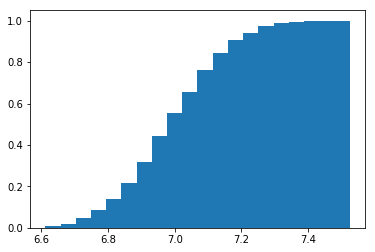

In [22]:
print('The 90% confidence interval is [' + str(np.percentile(samplemeans, 5)) + ", " + \
str(np.percentile(samplemeans, 95)) + "]")


plt.hist(samplemeans, bins=20, normed=True, cumulative=True)

plt.show()